<a href="https://colab.research.google.com/github/howard1028/Advance_machine_learning/blob/main/hw1_1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import torch
import torch.nn as nn
from torch.optim import optimizer
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
# 0) prepare data
x = np.empty((0))
y = np.empty((0))
csv_file = np.genfromtxt('/content/drive/MyDrive/Colab Notebooks/進階機器學習/HW1-1.csv', delimiter=',', skip_header = 1)
csv_file = csv_file.tolist()
csv_file.sort(key = lambda l:l[0])
csv_file = np.array(csv_file)

for data in csv_file: # 逐筆放入陣列中
    x = np.append(x, float(data[0]))
    y = np.append(y, float(data[1]))

tensor_x = torch.tensor(x, dtype=torch.float32) # 將 numpy array 轉化成 tensor
tensor_y = torch.tensor(y, dtype=torch.float32)
tensor_x = tensor_x.view(tensor_x.shape[0], 1)
tensor_y = tensor_y.view(tensor_y.shape[0], 1)


In [12]:

# 1.model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()

        #定義多層神經網路
        self.layer1 = nn.Linear(1, 1024)
        self.layer2 = nn.Linear(1024, 1)

        #設定dropout
        self.dropout = nn.Dropout(0.25)
        
    def forward(self, x):
        x = self.layer1(x)
        x = F.relu(x)
        x = self.dropout(x)

        x = self.layer2(x)
        return x

model = LinearRegression() #建立model


Epoch: [1/5], Iteration: [100/10000], loss: 4.170
Epoch: [1/5], Iteration: [200/10000], loss: 3.679
Epoch: [1/5], Iteration: [300/10000], loss: 3.270
Epoch: [1/5], Iteration: [400/10000], loss: 3.114
Epoch: [1/5], Iteration: [500/10000], loss: 2.792
Epoch: [1/5], Iteration: [600/10000], loss: 2.719
Epoch: [1/5], Iteration: [700/10000], loss: 2.436
Epoch: [1/5], Iteration: [800/10000], loss: 2.229
Epoch: [1/5], Iteration: [900/10000], loss: 2.061
Epoch: [1/5], Iteration: [1000/10000], loss: 2.005
Epoch: [1/5], Iteration: [1100/10000], loss: 1.848
Epoch: [1/5], Iteration: [1200/10000], loss: 1.742
Epoch: [1/5], Iteration: [1300/10000], loss: 1.767
Epoch: [1/5], Iteration: [1400/10000], loss: 1.490
Epoch: [1/5], Iteration: [1500/10000], loss: 1.521
Epoch: [1/5], Iteration: [1600/10000], loss: 1.468
Epoch: [1/5], Iteration: [1700/10000], loss: 1.385
Epoch: [1/5], Iteration: [1800/10000], loss: 1.301
Epoch: [1/5], Iteration: [1900/10000], loss: 1.241
Epoch: [1/5], Iteration: [2000/10000], l

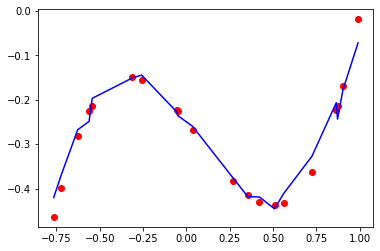

In [13]:

# 2) loss and optimizer
learning_rate = 0.001 # learning rate
criterion = nn.MSELoss() # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # gradient descent


# 3) training loop
epochs = 5
training_time = 10000
for epoch in range(epochs):
    running_loss = 0.0

    for time in range(training_time):
        # forward pass and loss
        y_predicted = model.forward(tensor_x)
        loss = criterion(y_predicted, tensor_y)

        #將梯度歸0
        optimizer.zero_grad()

        # backward pass
        loss.backward()

        # update
        optimizer.step()
        
        # 計算loss
        running_loss += loss.item()

        if(time % 100 == 99):
            print("Epoch: [%d/%d], Iteration: [%s/%s], loss: %.3f" % (epoch+1, epochs, time+1, training_time, running_loss))
            running_loss = 0


# 印出結果
predicted = model(tensor_x).detach().numpy()
plt.plot(tensor_x, tensor_y, 'ro')
plt.plot(tensor_x, predicted, 'b')
plt.show()